# Practice 09 - k-Means and Hierarchical Clustering

We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

In [106]:
dataset = pd.read_csv('Complexity 1/iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [107]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,versicolor
69,5.6,2.5,3.9,1.1,versicolor
128,6.4,2.8,5.6,2.1,virginica
29,4.7,3.2,1.6,0.2,setosa
92,5.8,2.6,4.0,1.2,versicolor


## Subject

* Plot **sepal width** vs. **sepal length** with colors corresponding to the specy
* Train a k-Means model for 3 clusters and plot the results
* Train a Hierarchical Clustering model for 3 clusters and plot the results
* Do again the first three steps now with **petal width** vs. **petal length**
* Which 2D plane gives the best results?

## Suggestion of correction

### Plot **sepal width** vs. **sepal length** with colors corresponding to the specy

In [108]:
# Define feature 1 and feature 2
feature_x = 'sepal_length'
feature_y = 'sepal_width'

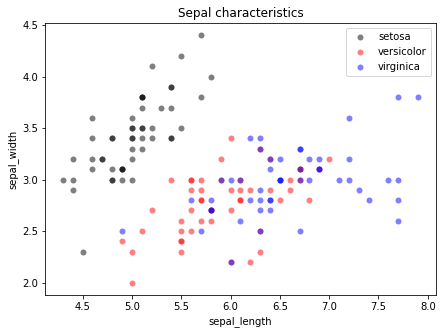

In [109]:
fig = plt.figure(figsize=(7,5))

# Loop on the species
for i, specy in enumerate(dataset['species'].unique()):
    # Plot feature 1 vs. feature 2
    plt.scatter(dataset[dataset['species']==specy][feature_x], dataset[dataset['species']==specy][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = specy)

# Figure style
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()

plt.show()

### Train a k-Means model for 3 clusters and plot the results

**Prepare the predictors:**

In [110]:
X = dataset[[feature_x, feature_y]]
X.sample(n=6)

,sepal_length,sepal_width
79,5.7,2.6
14,5.8,4.0
82,5.8,2.7
123,6.3,2.7
67,5.8,2.7
98,5.1,2.5


**Feature scaling:**

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**K-mean clustering:**

In [112]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [113]:
y_pred = kmeans.predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 2 0 0
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


**Plot the results:**

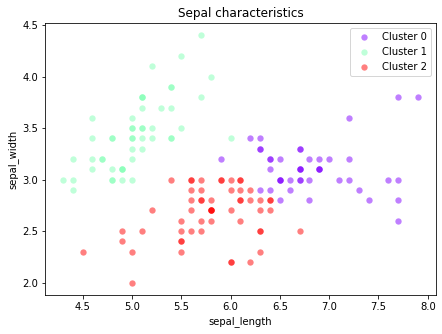

In [114]:
fig = plt.figure(figsize=(7,5))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()

### Train a Hierarchical Clustering model for 3 clusters and plot the results

**K-mean clustering:**

In [115]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')

In [116]:
y_pred = hc.fit_predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


**Plot the results:**

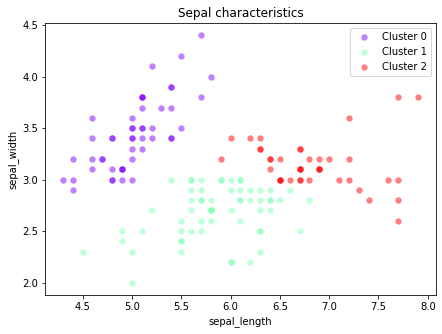

In [117]:
fig = plt.figure(figsize=(7,5))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()

### Do again the first three steps now with **petal width** vs. **petal length**

In [138]:
# Define feature 1 and feature 2
feature_x = 'petal_length'
feature_y = 'petal_width'

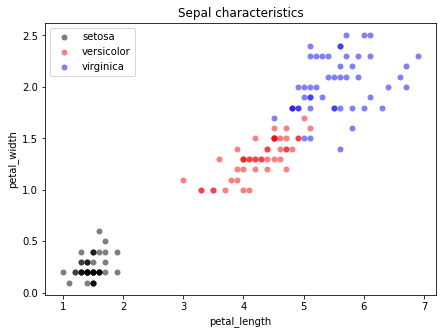

In [139]:
fig = plt.figure(figsize=(7,5))
       
# Loop on the species
for i, specy in enumerate(dataset['species'].unique()):
    # Plot feature 1 vs. feature 2
    plt.scatter(dataset[dataset['species']==specy][feature_x], dataset[dataset['species']==specy][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = specy)

# Figure style
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()

plt.show()

**Prepare the predictors:**

In [140]:
X = dataset[[feature_x, feature_y]]
X.sample(n=6)

,petal_length,petal_width
115,5.3,2.3
111,5.3,1.9
77,5.0,1.7
130,6.1,1.9
95,4.2,1.2
66,4.5,1.5


**Feature scaling:**

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**K-mean clustering:**

In [142]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [143]:
y_pred = kmeans.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


**Plot the results:**

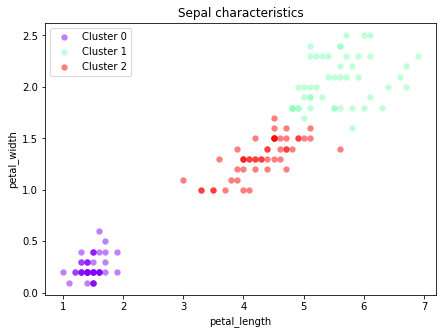

In [144]:
fig = plt.figure(figsize=(7,5))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()

**K-mean clustering:**

In [145]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')

In [146]:
y_pred = hc.fit_predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**Plot the results:**

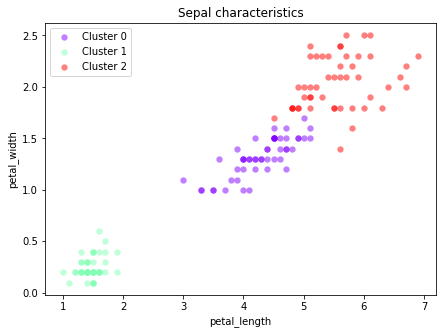

In [147]:
fig = plt.figure(figsize=(7,5))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()

### Which 2D plane gives the best results?

Visually, the plane sepal_length/sepal_width is more subject to class interlacing whereas the plane petal_length/petal_width offers more class separation. This latter plane has shown to give better results for computing a clustering.

### Bonus: Clustering in 4 dimensions

In [148]:
X = dataset.drop('species', axis=1)
X.sample(n=6)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
79,5.7,2.6,3.5,1.0
34,4.9,3.1,1.5,0.1
18,5.7,3.8,1.7,0.3
1,4.9,3.0,1.4,0.2
103,6.3,2.9,5.6,1.8


In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [154]:
k = 3

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [155]:
y_pred = kmeans.predict(X)

In [156]:
# Define feature 1 and feature 2
# feature_x = 'sepal_length'
# feature_y = 'sepal_width'
feature_x = 'petal_length'
feature_y = 'petal_width'

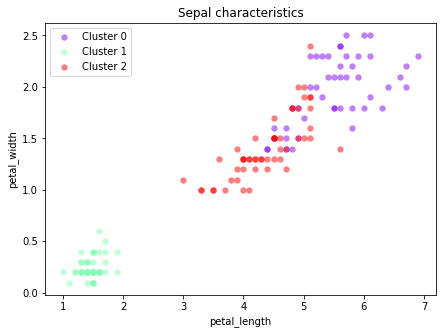

In [157]:
fig = plt.figure(figsize=(7,5))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()